The Social Media Sentiments Analysis Dataset captures a vibrant tapestry of emotions, trends, and interactions across various social media platforms. This dataset provides a snapshot of user-generated content, encompassing text, timestamps, hashtags, countries, likes, and retweets. Each entry unveils unique stories—moments of surprise, excitement, admiration, thrill, contentment, and more—shared by individuals worldwide.

| Column     | Description                                                                 |
|------------|-----------------------------------------------------------------------------|
| Text       | User-generated content showcasing sentiments                                |
| Sentiment  | Categorized emotions                                                        |
| Timestamp  | Date and time information                                                   |
| User       | Unique identifiers of users contributing                                    |
| Platform   | Social media platform where the content originated                          |
| Hashtags   | Identifies trending topics and themes                                      |
| Likes      | Quantifies user engagement (likes)                                         |
| Retweets   | Reflects content popularity (retweets)                                     |
| Country    | Geographical origin of each post                                           |
| Year       | Year of the post                                                           |
| Month      | Month of the post                                                          |
| Day        | Day of the post                                                            |
| Hour       | Hour of the post                                                           |


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [78]:
df = pd.read_csv('sentimentdataset.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


## Data Cleaning

In [80]:
# drop column Unnamed: 0.1
df.drop(columns='Unnamed: 0.1',inplace=True)
# Rename column Unnamed: 0 to id
df.rename(columns={'Unnamed: 0':'Id'},inplace=True)

In [81]:
# Strip leading/trailing whitespace from string columns
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [82]:
# Convert Timestamp to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['Timestamp'].dtype

dtype('<M8[ns]')

In [83]:
# Standardize sentiment labels
df['Sentiment'] = df['Sentiment'].str.strip().str.capitalize()

In [84]:
# Drop duplicate rows if any
df.drop_duplicates(inplace=True)

In [85]:
# Convert Likes and Retweets to integers (optional rounding)
df['Likes'] = df['Likes'].fillna(0).astype(int)
df['Retweets'] = df['Retweets'].fillna(0).astype(int)

In [86]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Id         732 non-null    int64         
 1   Text       732 non-null    object        
 2   Sentiment  732 non-null    object        
 3   Timestamp  732 non-null    datetime64[ns]
 4   User       732 non-null    object        
 5   Platform   732 non-null    object        
 6   Hashtags   732 non-null    object        
 7   Retweets   732 non-null    int64         
 8   Likes      732 non-null    int64         
 9   Country    732 non-null    object        
 10  Year       732 non-null    int64         
 11  Month      732 non-null    int64         
 12  Day        732 non-null    int64         
 13  Hour       732 non-null    int64         
dtypes: datetime64[ns](1), int64(7), object(6)
memory usage: 80.2+ KB
None


,Id,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,Enjoying a beautiful day at the park!,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12
1,1,Traffic was terrible this morning.,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8
2,2,Just finished an amazing workout! 💪,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15
3,3,Excited about the upcoming weekend getaway!,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18
4,4,Trying out a new recipe for dinner tonight.,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19


## EDA 

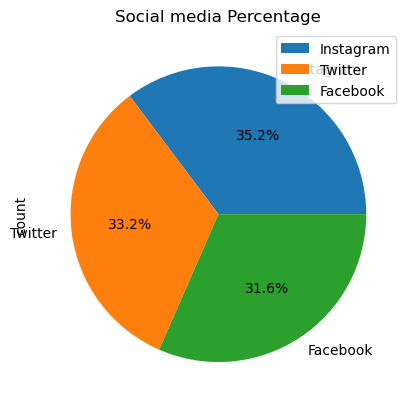

In [95]:
#Social media platform
df['Platform'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Social media Percentage')
plt.legend()
plt.show()

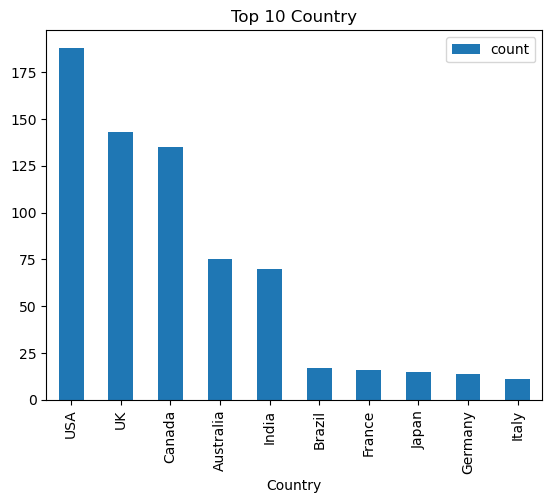

In [96]:
#Top 10 countries
df['Country'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Country')
plt.legend()
plt.show()

## Sentiment Analysis

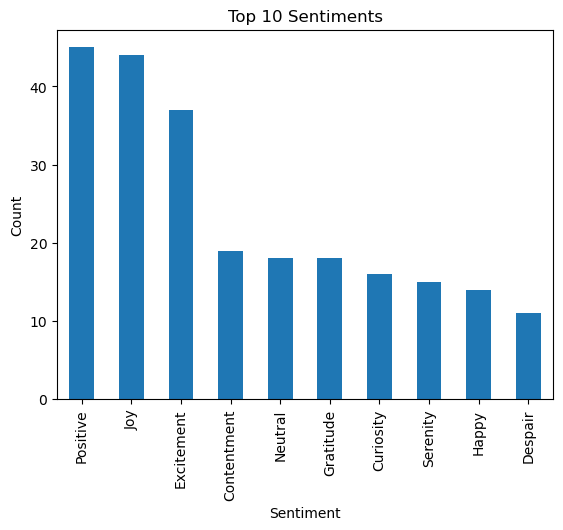

In [100]:
# What emotions dominate user-generated content?
top_sentiments = df['Sentiment'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [31]:
!pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   -------------------------------- ------ 524.3/624.3 kB 14.3 MB/s eta 0:00:01
   ---------------------------------------- 624.3/624.3 kB 1.9 MB/s eta 0:00:00


In [154]:
from textblob import TextBlob
df['sentiment'] = df['Text'].apply(lambda x: TextBlob(str(x)).sentiment)
df['polarity'] = df['Text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['subjectivity'] = df['Text'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)
print("Sentiment analysis results:")
print(df[['Text', 'polarity', 'subjectivity']].head())

# Classify based on polarity
def map_sentiment(p):
    if p > 0.1:
        return 'Positive'
    elif p < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['Blob_Sentiment'] = df['polarity'].apply(map_sentiment)

Sentiment analysis results:
                                          Text  polarity  subjectivity
0        Enjoying a beautiful day at the park!  0.750000      0.800000
1           Traffic was terrible this morning. -1.000000      1.000000
2          Just finished an amazing workout! 💪  0.750000      0.900000
3  Excited about the upcoming weekend getaway!  0.468750      0.750000
4  Trying out a new recipe for dinner tonight.  0.136364      0.454545


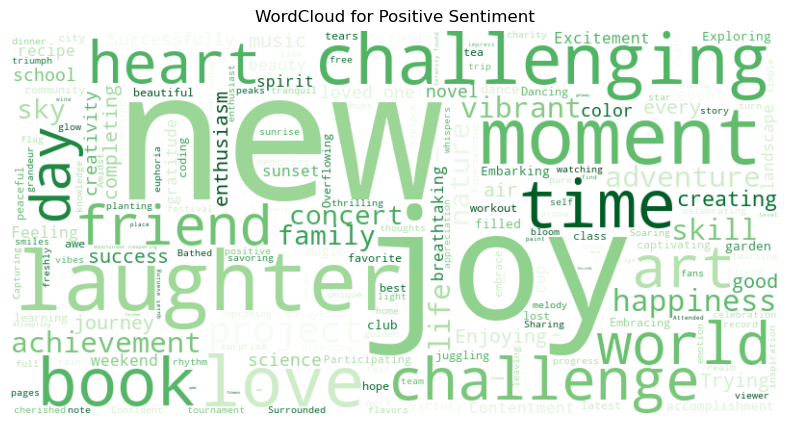

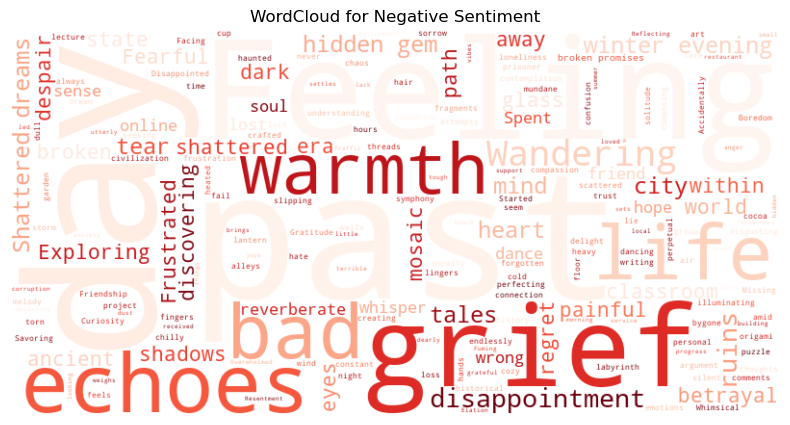

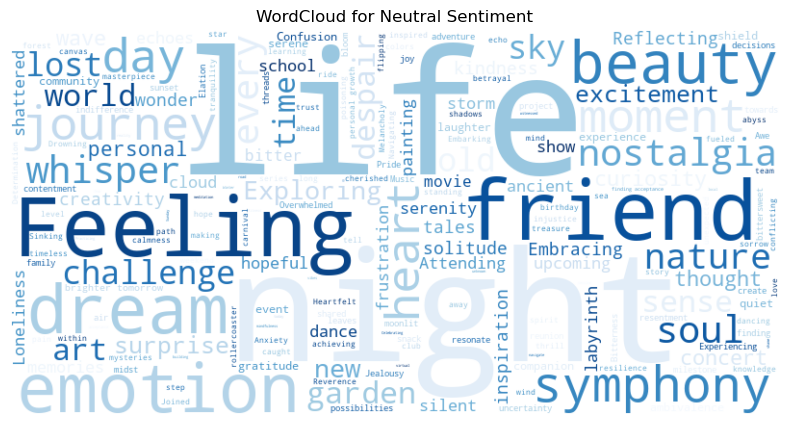

In [156]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt  # Added import for plt

def plot_wordcloud(sentiment, color):
    # Using the text directly from the DataFrame without filtering by 'Cleaned_Text'
    text = " ".join(df[df['Blob_Sentiment'] == sentiment]['Text'])  # Changed 'Cleaned_Text' to 'Text'
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=color).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {sentiment} Sentiment")
    plt.show()

plot_wordcloud('Positive', 'Greens')
plot_wordcloud('Negative', 'Reds')
plot_wordcloud('Neutral', 'Blues')

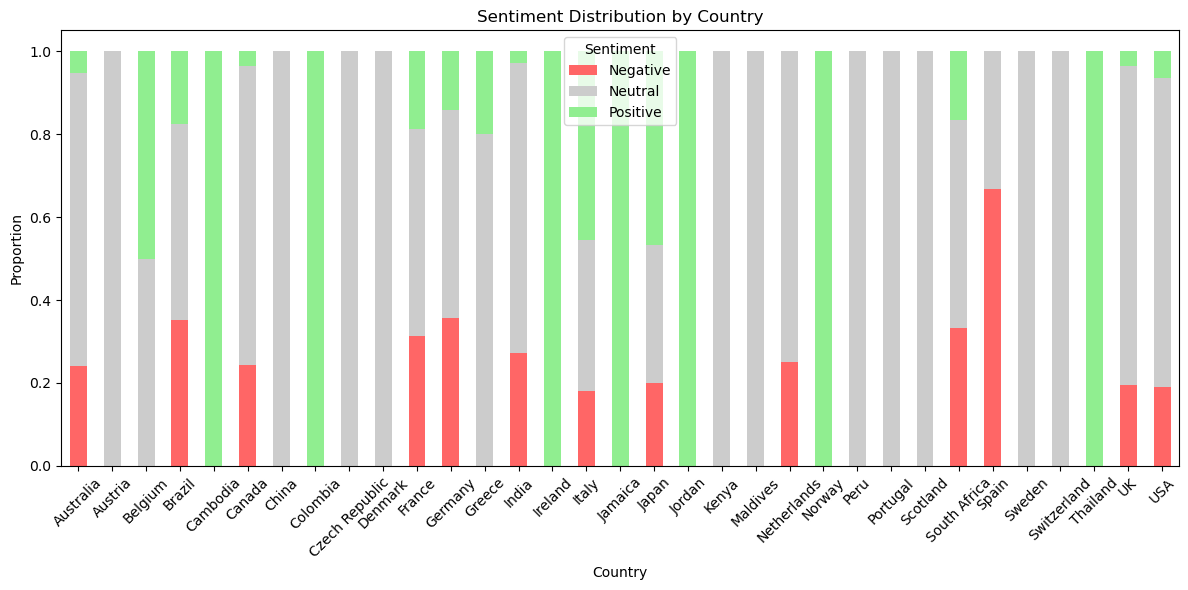

In [157]:
#How does sentiment vary across countries?
sentiment_country = df.groupby(['Country', 'Sentiment_Simple']).size().reset_index(name='Count')
country_totals = sentiment_country.groupby('Country')['Count'].transform('sum')
sentiment_country['Proportion'] = sentiment_country['Count'] / country_totals

#Visualize
sentiment_pivot = sentiment_country.pivot(index='Country', columns='Sentiment_Simple', values='Proportion').fillna(0)
colors = {'Negative': '#ff6666', 
          'Neutral': '#cccccc',   
          'Positive': '#90ee90'} 
sentiment_pivot.plot(kind='bar', stacked=True, figsize=(12,6), color=[colors.get(x, '#333333') for x in sentiment_pivot.columns])
plt.title('Sentiment Distribution by Country')
plt.ylabel('Proportion')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

- Markets with higher positivity favor cheerful messaging; negative-leaning ones may need reassurance or authenticity. 
- Monitoring spikes in negative sentiment per country can flag brand or social issues early.
- High-neutral regions might indicate an opportunity to lean into emotional storytelling to increase impact.



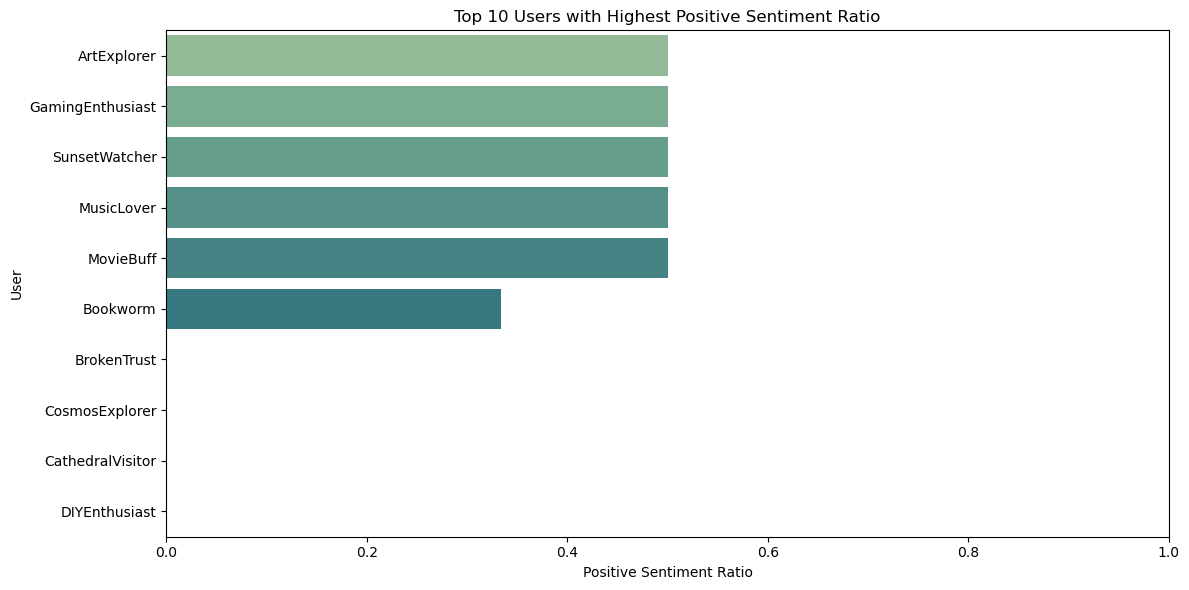

In [160]:
# Which user drive the most positive sentiment?
df['Sentiment'] = df['Sentiment'].str.strip().str.capitalize()

user_sentiment = df.groupby(['User', 'Sentiment']).size().unstack(fill_value=0)
user_sentiment['Total_Posts'] = user_sentiment.sum(axis=1)
user_sentiment['Positive_Ratio'] = user_sentiment.get('Positive', 0) / user_sentiment['Total_Posts']

filtered = user_sentiment[user_sentiment['Total_Posts'] >= 2]

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_users,
    x='Positive_Ratio',
    y='User',
    palette='crest'
)
plt.title("Top 10 Users with Highest Positive Sentiment Ratio")
plt.xlabel("Positive Sentiment Ratio")
plt.ylabel("User")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

## Peak Hours

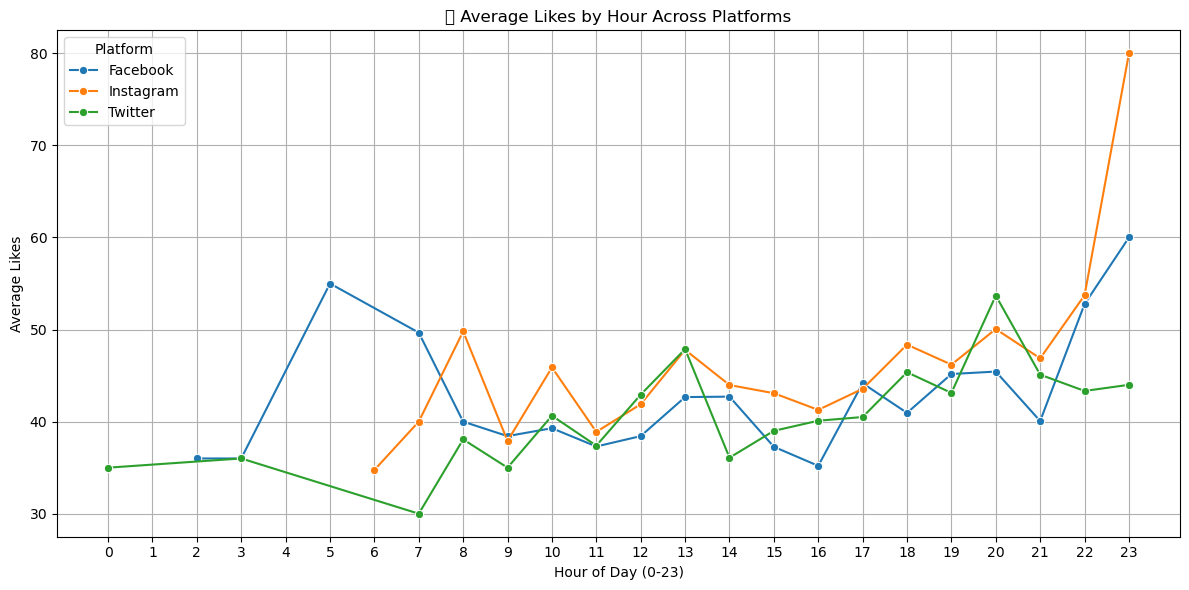

In [161]:
# What are the peak hours for engagement across platforms?
df['Platform'] = df['Platform'].str.strip().str.capitalize()
likes_hour = df.groupby(['Platform', 'Hour'])['Likes'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=likes_hour, x='Hour', y='Likes', hue='Platform', marker='o')
plt.title("⏰ Average Likes by Hour Across Platforms")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Average Likes")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


- Instagram peaks dramatically at 23:00 (11 PM), with average likes soaring above 80. This suggests that late-night posts perform best—possibly due to users unwinding and scrolling before bed.

- Facebook shows a spike around 5:00 AM—an unexpected early riser trend—and again at 11 PM, though not as sharply as Instagram.

- Twitter maintains a relatively stable profile throughout the day with minor bumps around 1 PM and 8 PM, indicating midday check-ins and evening recaps.

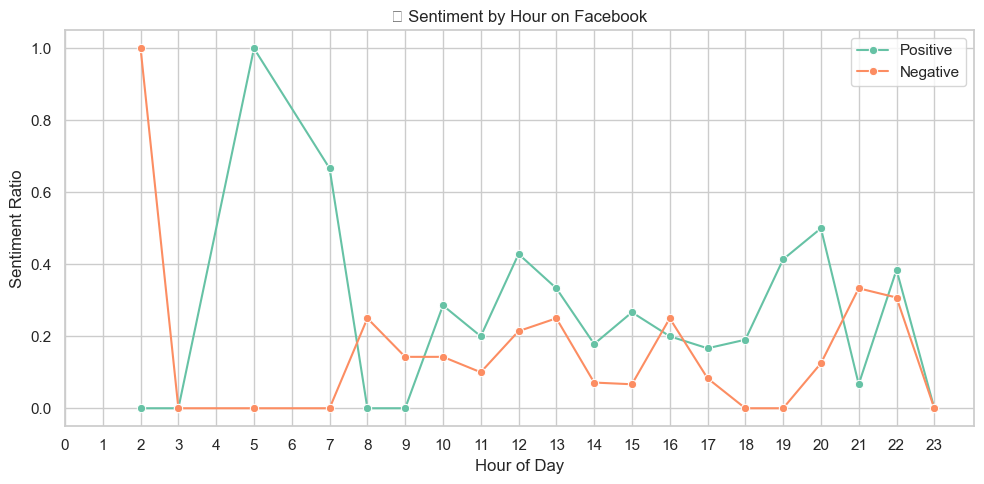

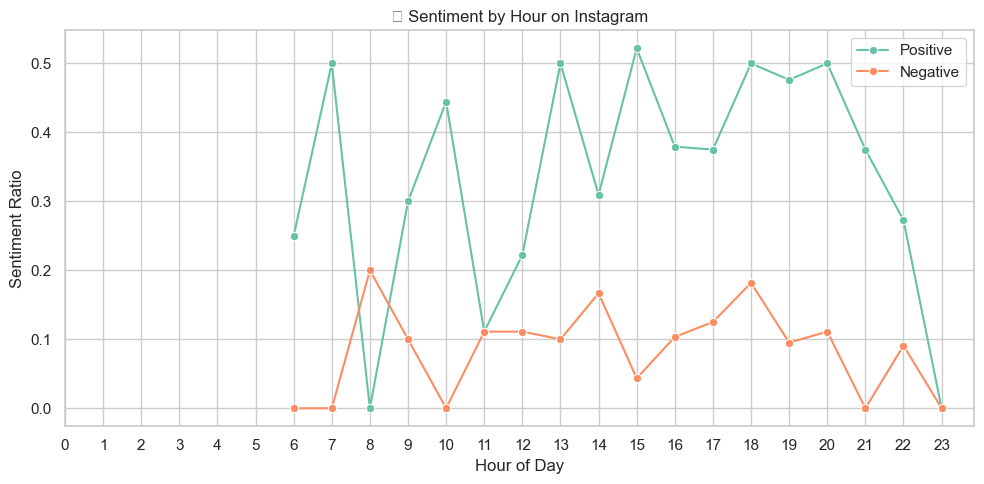

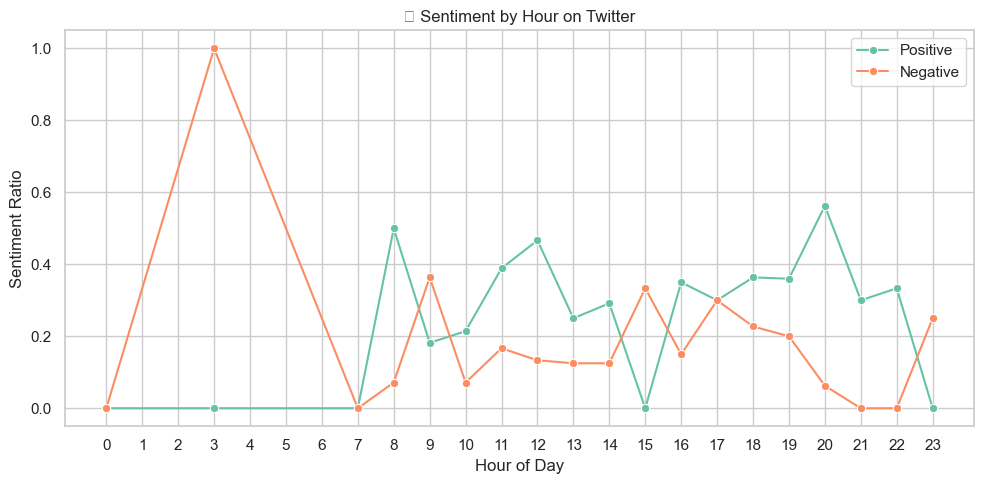

In [170]:
platforms = pivot['Platform'].unique()
sns.set(style="whitegrid")
palette = {"Positive_Ratio": "#66c2a5", "Negative_Ratio": "#fc8d62"}
for platform in platforms:
    platform_data = pivot[pivot['Platform'] == platform]

    plt.figure(figsize=(10, 5))
    sns.lineplot(data=platform_data, x='Hour', y='Positive_Ratio', label='Positive', color=palette['Positive_Ratio'], marker='o')
    sns.lineplot(data=platform_data, x='Hour', y='Negative_Ratio', label='Negative', color=palette['Negative_Ratio'], marker='o')
    
    plt.title(f"🕒 Sentiment by Hour on {platform}")
    plt.xlabel("Hour of Day")
    plt.ylabel("Sentiment Ratio")
    plt.xticks(range(0, 24))
    plt.legend()
    plt.tight_layout()
    plt.show()

Suggesting suitable hour to post on different platform:
- Facebook: users start and end their day with more uplifting posts. Negative sentiment has a spike around 2 AM, possibly due to late-night frustration or emotional venting.
- Instagram: Shows the most consistent positive sentiment across all hours.
- Twitter: Notably high negative sentiment at 2 AM, standing out among all platforms—classic “late-night tweeting” energy. Positive sentiment on Twitter picks up slightly after 8 PM, hitting its mild peak at 9 PM.

## Hashtag

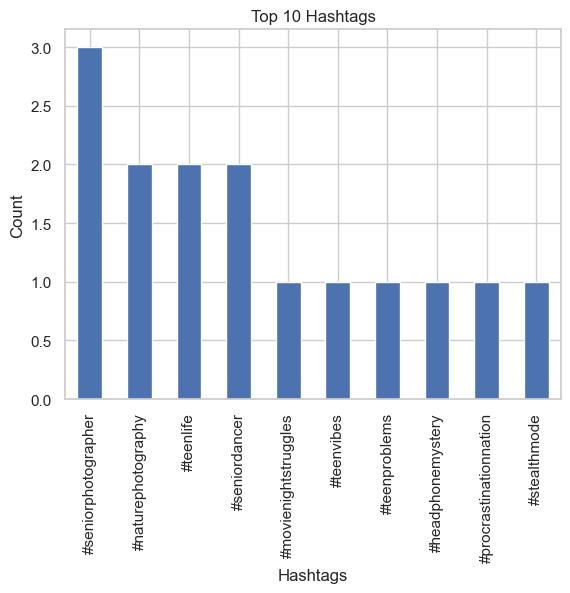

In [180]:
exploded_hashtags = df['Hashtags'].explode()
top_hashtags = exploded_hashtags.value_counts().nlargest(10)

top_hashtags.plot(kind='bar')
plt.title('Top 10 Hashtags')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.show()

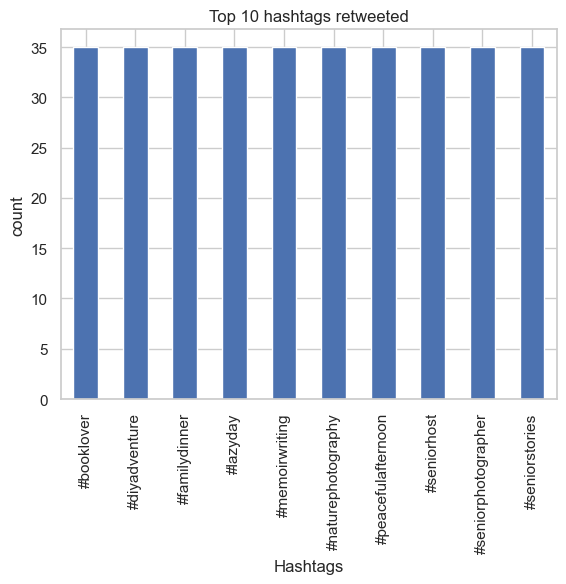

In [183]:
df_exploded = df.explode('Hashtags')
Hash_retweet = df_exploded.groupby('Hashtags')['Retweets'].max().nlargest(10).sort_values(ascending=False).plot(kind='bar')

plt.title('Top 10 hashtags retweeted')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()